## 线性回归

计算了 mse

| 模型                 | mse   |
|--------------------|-------|
| 手写代码-全部特征     | 22.78 |
| 调用 API-全部特征   | 22.78 |
| 手写代码-部分特征     | 56.68 |
| 调用 API-部分特征   | 56.68 |


### 全部特征

#### 1. 手写代码

In [180]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error


# 手写线性模型
class LinearModel:
    def __init__(self):
        self.w = np.array([])
        pass

    # 训练，传入训练集的 X 向量的列表和 Y 的列表
    def train(self, x: np.ndarray, y: np.ndarray):
        if x.shape[0] != y.shape[0]:
            print(f"error: x's len is not same as y, {x.shape} and {y.shape}")
            exit(1)
        x = np.concatenate((np.array([1] * n).reshape((n, 1)), x), axis=1)
        # 最小二乘法
        self.w = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)

    # 加载模型，设置 W 向量
    def load(self, w: np.ndarray):
        self.w = w

    # 预测，传入的为 X 向量
    def predict(self, X: np.ndarray):
        y = []
        for x in X:
            y.append(self.w.T.dot(np.concatenate((np.array([1]), x)).T.reshape(self.w.shape))[0])
        # print(self.w.shape)
        # print(x.shape)
        return y

    def __str__(self):
        arr = []
        for i, wi in enumerate(self.w):
            arr.append(f'{wi[0]}' + (f'x{i}' if i != 0 else ''))
        return ' + '.join(arr)

训练结果，W 向量：[[ 3.00771669e+01]
 [-2.02135297e-01]
 [ 4.41276341e-02]
 [ 5.26739364e-02]
 [ 1.88474315e+00]
 [-1.49281487e+01]
 [ 4.76038673e+00]
 [ 2.88734527e-03]
 [-1.30025278e+00]
 [ 4.61661953e-01]
 [-1.55434673e-02]
 [-8.11632369e-01]
 [-1.97174433e-03]
 [-5.32273431e-01]]
预测 x: [[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8

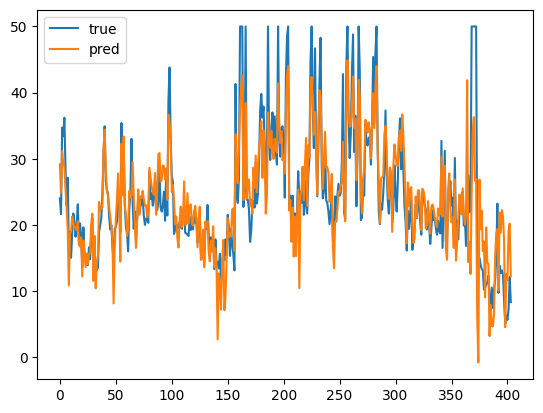

In [181]:
df = pd.read_csv('./实验一 线性模型 数据集/housing-data.csv')
l = len(df)

# 取前 80% 作为训练数据，后 20% 为测试数据
train_data = df[:math.floor(l * 0.8)]
test_data = df[math.floor(l * 0.8):]

# 训练集 y 和 x
train_y = np.array(train_data[['price']])
train_x = np.array(
    train_data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']])
n = len(train_y)

# 测试集 y 和 x
test_y = np.array(train_data[['price']])
test_x = np.array(
    train_data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']])

linear_model = LinearModel()

# 使用训练数据训练模型
linear_model.train(train_x, train_y)
print(f'训练结果，W 向量：{linear_model.w}')

# 预测
pred_y = linear_model.predict(test_x[0:10])
print(f'预测 x: {test_x[0:10]}，\n预测 y: {pred_y}，\n真实 y:{test_y[0:10]}')

# 评估（计算mse）
pred_y = linear_model.predict(test_x)
mse = mean_squared_error(pred_y, test_y)
print(f'mse: {mean_squared_error(pred_y, test_y)}')

# 画图
plt.plot([i for i in range(len(test_y))], test_y, label='true')
plt.plot([i for i in range(len(test_y))], pred_y, label='pred')
plt.legend()

#### 2. 调用 API

系数：[[-2.02135297e-01  4.41276341e-02  5.26739364e-02  1.88474315e+00
  -1.49281487e+01  4.76038673e+00  2.88734527e-03 -1.30025278e+00
   4.61661953e-01 -1.55434673e-02 -8.11632369e-01 -1.97174433e-03
  -5.32273431e-01]]
预测 x: [6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]，
预测 y: [[29.13979681]]，
真实 y:[24.]
mse: 22.77837952180079


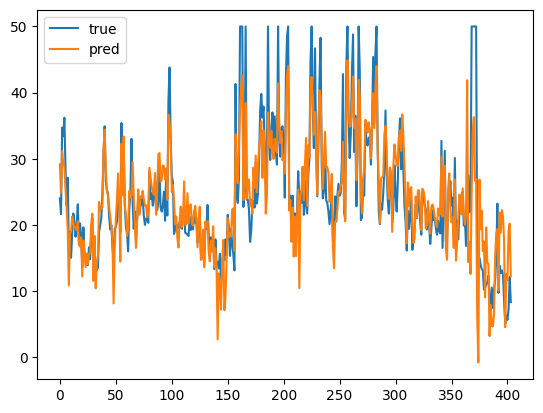

In [182]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 样本特征
X = np.array(train_x)
y = np.array(train_y)

# 创建线性回归模型
model = LinearRegression()

# 训练模型
model.fit(X, y)
print(f'系数：{model.coef_}')

# 预测
y_pred = model.predict([test_x[0]])

# 打印预测结果
print(f'预测 x: {test_x[0]}，\n预测 y: {y_pred}，\n真实 y:{test_y[0]}')

y = model.predict(test_x)
print(f'mse: {mean_squared_error(y, test_y)}')

# 画图
plt.plot([i for i in range(len(test_y))], test_y, label='true')
plt.plot([i for i in range(len(test_y))], pred_y, label='pred')
plt.legend()

### 部分特征
#### 1. 手写代码

训练结果，W 向量：[[ 5.23579970e+01]
 [ 1.38465508e-01]
 [-3.98052200e-01]
 [ 5.67990521e+00]
 [-1.92297508e+01]
 [-2.29257366e+00]
 [ 2.60090949e-01]
 [-2.50312125e-02]]
预测 x: [[ 18.       2.31     0.       0.538    4.09     1.     296.    ]
 [  0.       7.07     0.       0.469    4.9671   2.     242.    ]
 [  0.       7.07     0.       0.469    4.9671   2.     242.    ]
 [  0.       2.18     0.       0.458    6.0622   3.     222.    ]
 [  0.       2.18     0.       0.458    6.0622   3.     222.    ]
 [  0.       2.18     0.       0.458    6.0622   3.     222.    ]
 [ 12.5      7.87     0.       0.524    5.5605   5.     311.    ]
 [ 12.5      7.87     0.       0.524    5.9505   5.     311.    ]
 [ 12.5      7.87     0.       0.524    6.0821   5.     311.    ]
 [ 12.5      7.87     0.       0.524    6.5921   5.     311.    ]]，
预测 y: [array([27.05949538]), array([23.60020065]), array([23.60020065]), array([24.00832095]), array([24.00832095]), array([24.00832095]), array([21.64764742]), array([2

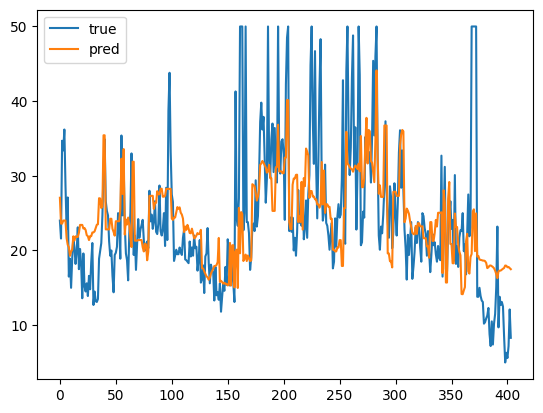

In [183]:
df = pd.read_csv('./实验一 线性模型 数据集/housing-data.csv')
l = len(df)

# 取前 80% 作为训练数据，后 20% 为测试数据
train_data = df[:math.floor(l * 0.8)]
test_data = df[math.floor(l * 0.8):]

# 训练集 y 和 x
train_y = np.array(train_data[['price']])
train_x = np.array(
    train_data[['ZN', 'INDUS', 'CHAS', 'NOX', 'DIS', 'RAD', 'TAX']])
n = len(train_y)

# 测试集 y 和 x
test_y = np.array(train_data[['price']])
test_x = np.array(
    train_data[['ZN', 'INDUS', 'CHAS', 'NOX', 'DIS', 'RAD', 'TAX']])

linear_model = LinearModel()

# 使用训练数据训练模型
linear_model.train(train_x, train_y)
print(f'训练结果，W 向量：{linear_model.w}')

# 预测
pred_y = linear_model.predict(test_x[0:10])
print(f'预测 x: {test_x[0:10]}，\n预测 y: {pred_y}，\n真实 y:{test_y[0:10]}')

# 评估（计算mse）
pred_y = linear_model.predict(test_x)
mse = mean_squared_error(pred_y, test_y)
print(f'mse: {mean_squared_error(pred_y, test_y)}')

# 画图
plt.plot([i for i in range(len(test_y))], test_y, label='true')
plt.plot([i for i in range(len(test_y))], pred_y, label='pred')
plt.legend()

#### 2. 调用 API

系数：[[  0.13846551  -0.3980522    5.67990521 -19.2297508   -2.29257366
    0.26009095  -0.02503121]]
预测 x: [ 18.      2.31    0.      0.538   4.09    1.    296.   ]，
预测 y: [[27.05949538]]，
真实 y:[24.]
mse: 56.68320420087483


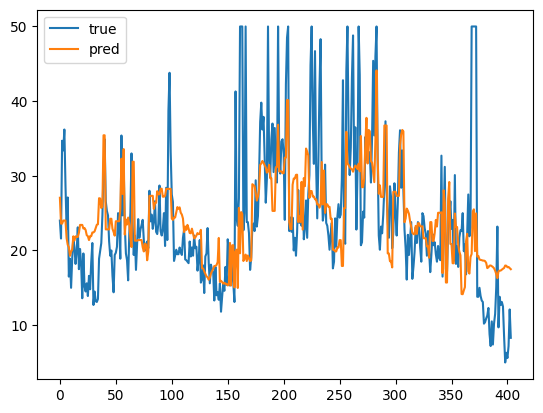

In [184]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 样本特征
X = np.array(train_x)
y = np.array(train_y)

# 创建线性回归模型
model = LinearRegression()

# 训练模型
model.fit(X, y)
print(f'系数：{model.coef_}')

# 预测
y_pred = model.predict([test_x[0]])

# 打印预测结果
print(f'预测 x: {test_x[0]}，\n预测 y: {y_pred}，\n真实 y:{test_y[0]}')

y = model.predict(test_x)
print(f'mse: {mean_squared_error(y, test_y)}')

# 画图
plt.plot([i for i in range(len(test_y))], test_y, label='true')
plt.plot([i for i in range(len(test_y))], pred_y, label='pred')
plt.legend()

## 逻辑回归

计算了 acc

| 模型                 | acc  |
|--------------------|------|
| 手写代码-未归一化-全部特征     | 0.63 |
| 手写代码-归一化-全部特征      | 0.91 |
| 调用 API-未归一化-全部特征   | 0.96 |
| 调用 API-未归一化-全部特征   | 0.96 |
| 手写代码-未归一化-部分特征     | 0.63 |
| 手写代码-归一化-部分特征      | 0.87 |
| 调用 API-未归一化-部分特征   | 0.95 |
| 调用 API-未归一化-部分特征   | 0.95 |


数据预处理
剔除缺省值，将数据保存为 csv。
这里将class从原先的2与4改为0与1，方便后续计算

In [185]:
with open('实验一 线性模型 数据集/breast-cancer-wisconsin.data', 'r') as f:
    data = f.readlines()
    arr = []
    for line in data:
        if line.find('?') > 0:
            continue
        line = line.replace('\n', '').split(',')
        # print(line)
        arr.append({
            'Sample code number': int(line[0]),
            'Clump Thickness': int(line[1]),
            'Uniformity of Cell Size': int(line[2]),
            'Uniformity of Cell Shape': int(line[3]),
            'Marginal Adhesion': int(line[4]),
            'Single Epithelial Cell Size': int(line[5]),
            'Bare Nuclei': int(line[6]),
            'Bland Chromatin': int(line[7]),
            'Normal Nucleoli': int(line[8]),
            'Mitoses': int(line[9]),
            'Class': 1 if int(line[10]) == 4 else 0,
        })

    df = pd.DataFrame(arr)
    df.to_csv('实验一 线性模型 数据集/breast-cancer-wisconsin.csv')

### 全部特征
#### 1. 手写代码

In [186]:
import numpy as np
import pandas as pd
from tqdm import tqdm


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# 手写逻辑回归模型
class LogisticModel:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.w = None

    # 交叉熵损失函数
    def _cost(self, h, y):
        m = len(y)
        cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        return cost

    # 训练，传入训练集的 X 向量的列表和 Y 的列表
    def train(self, _X: np.ndarray, y: np.ndarray):
        X = np.hstack((np.ones((_X.shape[0], 1)), _X))  # 添加偏置
        m, n_features = X.shape
        self.w = np.zeros(n_features)

        for _ in tqdm(range(self.num_iterations)):
            h = sigmoid(np.dot(X, self.w))

            dw = (1 / m) * np.dot((h - y), X)
            dw = np.sum(dw, axis=0)

            self.w -= self.learning_rate * dw.T

    # 加载模型，设置 W 向量
    def load(self, w: np.ndarray):
        self.w = w

    # 预测，传入的为 X 向量
    def predict(self, _X: np.ndarray):
        X = np.hstack((np.ones((_X.shape[0], 1)), _X))  # 添加偏置
        h = np.dot(X, self.w)
        predictions = sigmoid(h)
        predictions_cls = [1 if p >= 0.5 else 0 for p in predictions]
        return predictions_cls

    # 传入用于测试的 x，y
    def test(self, _X: np.ndarray, _y: np.ndarray):
        pred_y = self.predict(_X)
        correct = 0
        total = len(_y)
        for i in range(total):
            if pred_y[i] == _y[i]:
                correct += 1

        acc = correct / total
        print(f'acc: {acc}')

In [192]:

df = pd.read_csv('./实验一 线性模型 数据集/breast-cancer-wisconsin.csv')
l = len(df)

# 取前 80% 作为训练数据，后 20% 为测试数据
train_data = df[:math.floor(l * 0.8)]
test_data = df[math.floor(l * 0.8):]

# 训练集 y 和 x
train_y = np.array(train_data[['Class']])
train_x = np.array(
    train_data[['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion',
                'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']])
n = len(train_y)

# 测试集 y 和 x
test_y = np.array(train_data[['Class']])
test_x = np.array(
    train_data[['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion',
                'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']])

logistic_model = LogisticModel()

# 归一化
std = train_x.std(axis=0)
mean = train_x.mean(axis=0)
train_x_norm = (train_x - mean) / std

logistic_model.train(train_x_norm, train_y)
print(logistic_model.w)

# 归一化
std = test_x.std(axis=0)
mean = test_x.mean(axis=0)
test_x_norm = (test_x - mean) / std

y_pred = logistic_model.predict(test_x_norm[0:10])

# 打印预测结果
print(f'预测 x: {test_x_norm[0:10]}，\n预测 y: {y_pred}，\n真实 y: {test_y[0:10]}')
logistic_model.test(test_x_norm, test_y)
# 未进行归一化时 acc 仅有 0.6，而归一化后可达 0.9

100%|██████████| 1000/1000 [00:01<00:00, 868.81it/s]

[-4.06142267  1.52247686  0.15107139  0.5453952   0.32536976  0.67277934
  1.36675944  0.6249277   0.586551   -0.14265028]
预测 x: [[ 0.1464563  -0.7338805  -0.76802046 -0.65419556 -0.57066425 -0.74760904
  -0.21286535 -0.64663892 -0.36740686]
 [ 0.1464563   0.25876711  0.24162441  0.73565182  1.58114983  1.66457142
  -0.21286535 -0.32272621 -0.36740686]
 [-0.53993974 -0.7338805  -0.76802046 -0.65419556 -0.57066425 -0.47958899
  -0.21286535 -0.64663892 -0.36740686]
 [ 0.48965431  1.58229726  1.58781758 -0.65419556 -0.14030143  0.05645111
  -0.21286535  1.29683731 -0.36740686]
 [-0.19674172 -0.7338805  -0.76802046  0.04072813 -0.57066425 -0.74760904
  -0.21286535 -0.64663892 -0.36740686]
 [ 1.17605034  2.24406233  2.26091416  1.77803735  1.58114983  1.66457142
   2.36037042  1.29683731 -0.36740686]
 [-1.22633577 -0.7338805  -0.76802046 -0.65419556 -0.57066425  1.66457142
  -0.21286535 -0.64663892 -0.36740686]
 [-0.88313775 -0.7338805  -0.43147217 -0.65419556 -0.57066425 -0.74760904
  -0.2

#### 2. 调用 API

In [200]:
from sklearn.linear_model import LogisticRegression

# 创建逻辑回归模型
model = LogisticRegression()

# 拟合模型
model.fit(train_x_norm, train_y)

# 使用模型进行预测
y_pred = model.predict(test_x_norm[0:10])

# 打印预测结果
print(f'预测 x: {test_x_norm[0:10]}，\n预测 y: {y_pred}，\n真实 y: {test_y[0:10]}')

print(f'coef: {model.coef_}')

pred_y = model.predict(test_x_norm)
correct = 0
total = len(test_y)
for i in range(total):
    if pred_y[i] == test_y[i]:
        correct += 1

acc = correct / total
print(f'acc: {acc}')

# 经过测试归一化与否并无影响

预测 x: [[ 0.1464563  -0.7338805  -0.76802046 -0.57066425 -0.64663892]
 [ 0.1464563   0.25876711  0.24162441  1.58114983 -0.32272621]
 [-0.53993974 -0.7338805  -0.76802046 -0.57066425 -0.64663892]
 [ 0.48965431  1.58229726  1.58781758 -0.14030143  1.29683731]
 [-0.19674172 -0.7338805  -0.76802046 -0.57066425 -0.64663892]
 [ 1.17605034  2.24406233  2.26091416  1.58114983  1.29683731]
 [-1.22633577 -0.7338805  -0.76802046 -0.57066425 -0.64663892]
 [-0.88313775 -0.7338805  -0.43147217 -0.57066425 -0.64663892]
 [-0.88313775 -0.7338805  -0.76802046 -0.57066425 -0.64663892]
 [-0.19674172 -0.40299796 -0.76802046 -0.57066425 -0.64663892]]，
预测 y: [0 1 0 1 0 1 0 0 0 0]，
真实 y: [[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]
coef: [[1.48690073 1.04553154 1.50533111 0.69804932 0.92569804]]
acc: 0.9523809523809523


/Users/azurice/.local/share/virtualenvs/MachineLearning-2023-YtcuE3un/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 部分特征
#### 1. 手写代码

In [196]:

df = pd.read_csv('./实验一 线性模型 数据集/breast-cancer-wisconsin.csv')
l = len(df)

# 取前 80% 作为训练数据，后 20% 为测试数据
train_data = df[:math.floor(l * 0.8)]
test_data = df[math.floor(l * 0.8):]

# 训练集 y 和 x
train_y = np.array(train_data[['Class']])
train_x = np.array(
    train_data[['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Single Epithelial Cell Size', 'Normal Nucleoli']])
n = len(train_y)

# 测试集 y 和 x
test_y = np.array(train_data[['Class']])
test_x = np.array(
    train_data[['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Single Epithelial Cell Size', 'Normal Nucleoli']])

logistic_model = LogisticModel()

# 归一化
std = train_x.std(axis=0)
mean = train_x.mean(axis=0)
train_x_norm = (train_x - mean) / std
# train_x_norm = train_x

logistic_model.train(train_x_norm, train_y)
print(logistic_model.w)

# 归一化
std = test_x.std(axis=0)
mean = test_x.mean(axis=0)
test_x_norm = (test_x - mean) / std
# test_x_norm = test_x

y_pred = logistic_model.predict(test_x_norm[0:10])

# 打印预测结果
print(f'预测 x: {test_x_norm[0:10]}，\n预测 y: {y_pred}，\n真实 y: {test_y[0:10]}')
logistic_model.test(test_x_norm, test_y)

100%|██████████| 1000/1000 [00:00<00:00, 1129.54it/s]

[-2.20231366  1.21773034  0.30864602  0.74837348  0.58815859  0.57279538]
预测 x: [[ 0.1464563  -0.7338805  -0.76802046 -0.57066425 -0.64663892]
 [ 0.1464563   0.25876711  0.24162441  1.58114983 -0.32272621]
 [-0.53993974 -0.7338805  -0.76802046 -0.57066425 -0.64663892]
 [ 0.48965431  1.58229726  1.58781758 -0.14030143  1.29683731]
 [-0.19674172 -0.7338805  -0.76802046 -0.57066425 -0.64663892]
 [ 1.17605034  2.24406233  2.26091416  1.58114983  1.29683731]
 [-1.22633577 -0.7338805  -0.76802046 -0.57066425 -0.64663892]
 [-0.88313775 -0.7338805  -0.43147217 -0.57066425 -0.64663892]
 [-0.88313775 -0.7338805  -0.76802046 -0.57066425 -0.64663892]
 [-0.19674172 -0.40299796 -0.76802046 -0.57066425 -0.64663892]]，
预测 y: [0, 0, 0, 1, 0, 1, 0, 0, 0, 0]，
真实 y: [[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]
acc: 0.86996336996337


#### 2. 调用 API

In [199]:
from sklearn.linear_model import LogisticRegression

# 创建逻辑回归模型
model = LogisticRegression()

# 拟合模型
model.fit(train_x_norm, train_y)

# 使用模型进行预测
y_pred = model.predict(test_x_norm[0:10])

# 打印预测结果
print(f'预测 x: {test_x_norm[0:10]}，\n预测 y: {y_pred}，\n真实 y: {test_y[0:10]}')

print(f'coef: {model.coef_}')

pred_y = model.predict(test_x_norm)
correct = 0
total = len(test_y)
for i in range(total):
    if pred_y[i] == test_y[i]:
        correct += 1

acc = correct / total
print(f'acc: {acc}')

# 经过测试归一化与否并无影响

预测 x: [[ 0.1464563  -0.7338805  -0.76802046 -0.57066425 -0.64663892]
 [ 0.1464563   0.25876711  0.24162441  1.58114983 -0.32272621]
 [-0.53993974 -0.7338805  -0.76802046 -0.57066425 -0.64663892]
 [ 0.48965431  1.58229726  1.58781758 -0.14030143  1.29683731]
 [-0.19674172 -0.7338805  -0.76802046 -0.57066425 -0.64663892]
 [ 1.17605034  2.24406233  2.26091416  1.58114983  1.29683731]
 [-1.22633577 -0.7338805  -0.76802046 -0.57066425 -0.64663892]
 [-0.88313775 -0.7338805  -0.43147217 -0.57066425 -0.64663892]
 [-0.88313775 -0.7338805  -0.76802046 -0.57066425 -0.64663892]
 [-0.19674172 -0.40299796 -0.76802046 -0.57066425 -0.64663892]]，
预测 y: [0 1 0 1 0 1 0 0 0 0]，
真实 y: [[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]
coef: [[1.48690073 1.04553154 1.50533111 0.69804932 0.92569804]]
acc: 0.9523809523809523


/Users/azurice/.local/share/virtualenvs/MachineLearning-2023-YtcuE3un/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
